In [1]:
from google.colab import files
uploaded = files.upload()


Saving vgsales.csv to vgsales.csv


In [2]:
import pandas as pd
# Leer archivo CSV
df = pd.read_csv('vgsales.csv')

# Mostrar las primeras filas del dataset para asegura de que se cargó correctamente
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:

# 2  INCISO A (PORCENTIL Y CUARTIL)

# Definir las columnas a analizar
columnas = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Crear un diccionario para almacenar los resultados
resultados = {}

def calcular_percentil(datos, p):
    # Paso 1: Ordenar los datos
    datos_ordenados = sorted(datos)

    # Paso 2: Calcular la posición del percentil
    N = len(datos_ordenados)
    posicion = (p / 100) * (N - 1)

    # Paso 3: Encontrar el valor del percentil
    if posicion.is_integer():
        return datos_ordenados[int(posicion)]
    else:
        parte_entera = int(posicion)
        parte_decimal = posicion - parte_entera

        valor_inferior = datos_ordenados[parte_entera]
        valor_superior = datos_ordenados[parte_entera + 1]

        # Interpolación lineal
        return valor_inferior + (valor_superior - valor_inferior) * parte_decimal


for columna in columnas:
    sales_data = df[columna].dropna().tolist()  # Eliminar NaN y convertir a lista

    cuartil_25 = calcular_percentil(sales_data, 25)
    cuartil_50 = calcular_percentil(sales_data, 50)  # Mediana
    cuartil_75 = calcular_percentil(sales_data, 75)

    percentil_10 = calcular_percentil(sales_data, 10)
    percentil_90 = calcular_percentil(sales_data, 90)

    resultados[columna] = {
        'Cuartil 25 (Q1)': cuartil_25,
        'Mediana (Q2)': cuartil_50,
        'Cuartil 75 (Q3)': cuartil_75,
        'Percentil 10 (P10)': percentil_10,
        'Percentil 90 (P90)': percentil_90
    }

# Mostrar los resultados por columna
for columna, stats in resultados.items():
    print(f"*************** Resultados para {columna} ****************")
    print("CUARTILES")
    print(f"Cuartil 25 (Q1): {stats['Cuartil 25 (Q1)']}")
    print(f"Cuartil (Q2): {stats['Mediana (Q2)']}")
    print(f"Cuartil 75 (Q3): {stats['Cuartil 75 (Q3)']}\n")

    print("PORCENTILES")
    print(f"Percentil 10 (P10): {stats['Percentil 10 (P10)']}")
    print(f"Percentil 90 (P90): {stats['Percentil 90 (P90)']}\n")

*************** Resultados para NA_Sales ****************
CUARTILES
Cuartil 25 (Q1): 0.0
Cuartil (Q2): 0.08
Cuartil 75 (Q3): 0.24

PORCENTILES
Percentil 10 (P10): 0.0
Percentil 90 (P90): 0.61

*************** Resultados para EU_Sales ****************
CUARTILES
Cuartil 25 (Q1): 0.0
Cuartil (Q2): 0.02
Cuartil 75 (Q3): 0.11

PORCENTILES
Percentil 10 (P10): 0.0
Percentil 90 (P90): 0.35

*************** Resultados para JP_Sales ****************
CUARTILES
Cuartil 25 (Q1): 0.0
Cuartil (Q2): 0.0
Cuartil 75 (Q3): 0.04

PORCENTILES
Percentil 10 (P10): 0.0
Percentil 90 (P90): 0.18

*************** Resultados para Other_Sales ****************
CUARTILES
Cuartil 25 (Q1): 0.0
Cuartil (Q2): 0.01
Cuartil 75 (Q3): 0.04

PORCENTILES
Percentil 10 (P10): 0.0
Percentil 90 (P90): 0.11

*************** Resultados para Global_Sales ****************
CUARTILES
Cuartil 25 (Q1): 0.06
Cuartil (Q2): 0.17
Cuartil 75 (Q3): 0.47

PORCENTILES
Percentil 10 (P10): 0.02
Percentil 90 (P90): 1.21



418.64102564102564


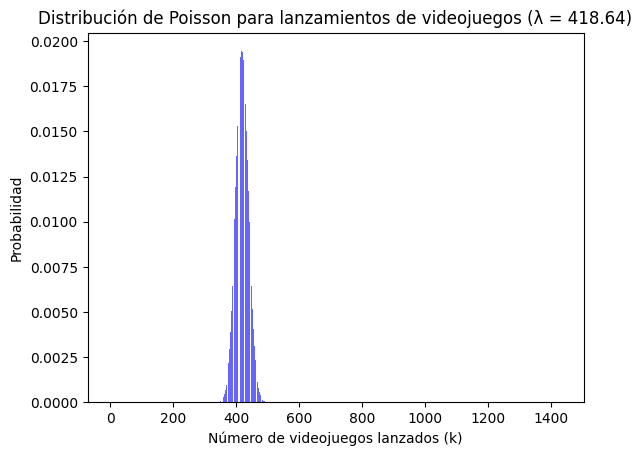

Promedio de lanzamientos por año (λ): 418.64


In [6]:
# 2 A #MODEL DE DISTRIBUCION POISSON
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Cargar el dataset
data = pd.read_csv('vgsales.csv')

# Contar el número de videojuegos lanzados por año
lanzamientos_por_año = data['Year'].value_counts().sort_index()

#print(lanzamientos_por_año);

# Calcular el promedio de lanzamientos por año (λ)
lambda_value = lanzamientos_por_año.mean()

print(lambda_value)

# Valores de k (número de videojuegos lanzados) para graficar
k_values = np.arange(0, lanzamientos_por_año.max() + 1)

# Calcular la distribución de Poisson
poisson_values = poisson.pmf(k_values, lambda_value)

# Graficar la distribución de Poisson
plt.bar(k_values, poisson_values, color='blue', alpha=0.6)
plt.xlabel('Número de videojuegos lanzados (k)')
plt.ylabel('Probabilidad')
plt.title(f'Distribución de Poisson para lanzamientos de videojuegos (λ = {lambda_value:.2f})')

# Mostrar gráfico
plt.show()

# Imprimir el promedio de lanzamientos por año
print(f'Promedio de lanzamientos por año (λ): {lambda_value:.2f}')



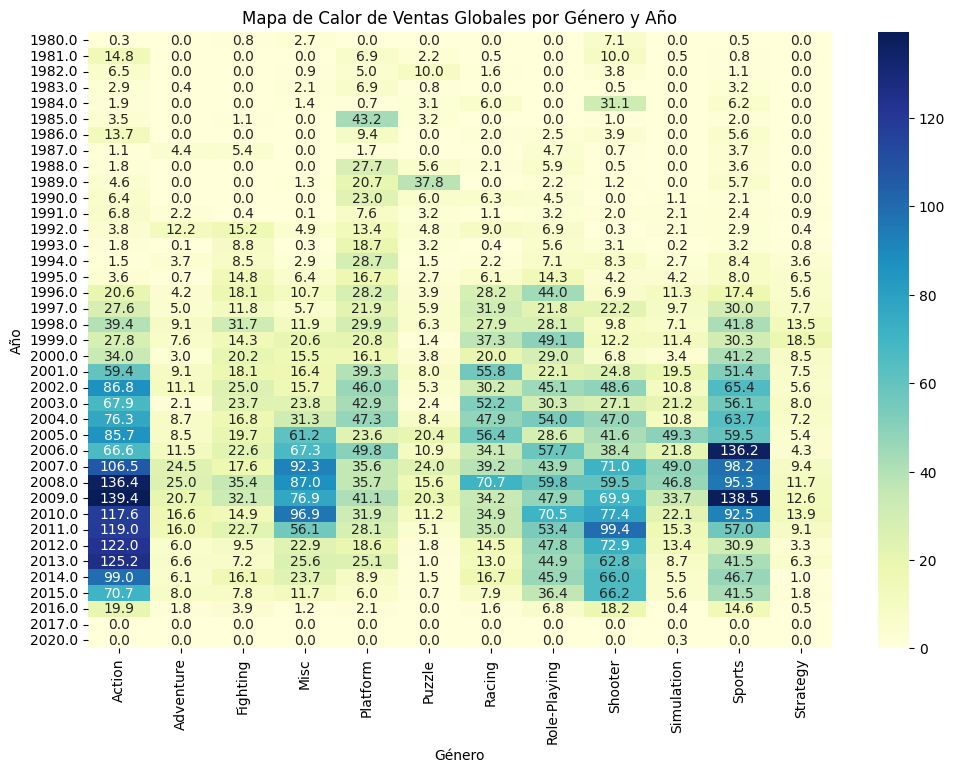

In [10]:

# 2. B
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
#data = pd.read_csv('vgsales.csv')

# Agrupar los datos por 'Year' y 'Genre', sumando las ventas globales
pivot_table = data.pivot_table(values='Global_Sales', index='Year', columns='Genre', aggfunc='sum', fill_value=0)


# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Mapa de Calor de Ventas Globales por Género y Año')
plt.xlabel('Género')
plt.ylabel('Año')
plt.show()



Resumen Estadístico:
             Media  Mediana  Moda
NA_Sales  0.264667     0.08   0.0
EU_Sales  0.146652     0.02   0.0
JP_Sales  0.077782     0.00   0.0


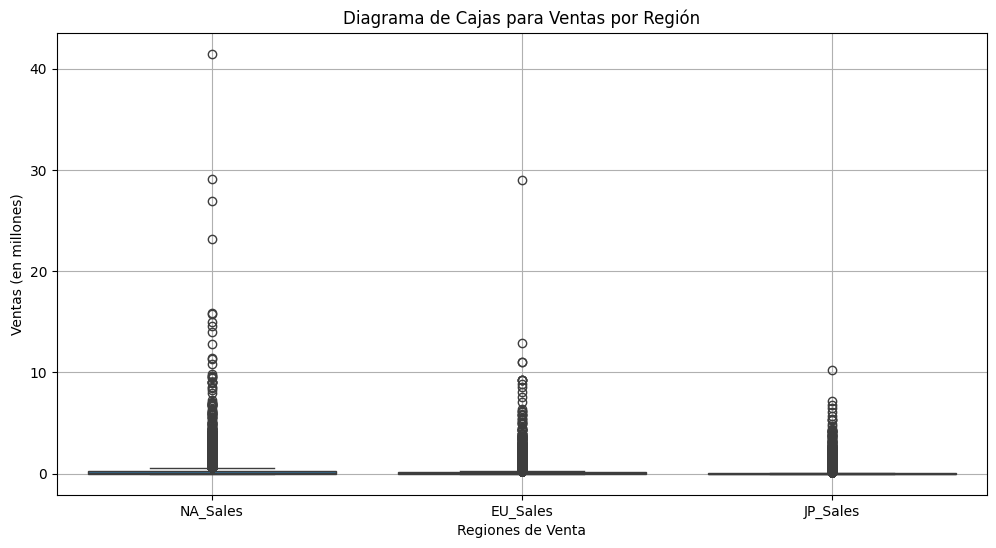

In [11]:
#2 C CAJAS BIGOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# df = pd.read_csv('tu_archivo.csv')

# Calcular las estadísticas
resumen_estadistico = {
    'NA_Sales': {
        'mean': df['NA_Sales'].mean(),
        'median': df['NA_Sales'].median(),
        'mode': df['NA_Sales'].mode()[0]
    },
    'EU_Sales': {
        'mean': df['EU_Sales'].mean(),
        'median': df['EU_Sales'].median(),
        'mode': df['EU_Sales'].mode()[0]
    },
    'JP_Sales': {
        'mean': df['JP_Sales'].mean(),
        'median': df['JP_Sales'].median(),
        'mode': df['JP_Sales'].mode()[0]
    }
}

# Convertir el resumen estadístico a un DataFrame
resumen_df = pd.DataFrame(resumen_estadistico).T

# Renombrar las columnas para mejor claridad
resumen_df.columns = ['Media', 'Mediana', 'Moda']

# Mostrar el DataFrame
print("Resumen Estadístico:")
print(resumen_df)

# Graficar un diagrama de cajas (boxplot) para las columnas seleccionadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['NA_Sales', 'EU_Sales', 'JP_Sales']])
plt.title('Diagrama de Cajas para Ventas por Región')
plt.ylabel('Ventas (en millones)')
plt.xlabel('Regiones de Venta')
plt.xticks(ticks=[0, 1, 2], labels=['NA_Sales', 'EU_Sales', 'JP_Sales'])
plt.grid(True)
plt.show()


